What is the data type of each feature? (ordinal/nominal/interval/ratio, discrete/continuous)


1. Longitude - Numerical, Continuous ,Interval
2. Latitude - Numerical, Continuous ,Interval 
3. housing_median_age - Numerical, Discrete, Ratio
4. total_rooms - Numerical, Discrete, Ratio
5. total_bedrooms - Numerical, Discrete, Ratio
6. population - Numerical, Discrete, Ratio
7. households - Numerical, Discrete, Ratio
8. median_income - Numerical, Continuous, Ratio
9. median_house_value - Numerical, Continuous, Ratio
10. ocean_proximity - Categorical, Ordinal

In [1]:
#Library input

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data

data=pd.read_csv('housing.csv')

In [3]:
#Check the data

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Display summary statistics of the data. What can you learn from it on the data?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Noticeable information from the summary 
 
 0. Dataset consists of 10 columns with 20639 samples 
 1. There are 207 missing values in total_bedrooms field
 2. We have 4 float variables, 5 integer variables, 1 object
 3. Dataset consumes a memory of ~1.7 MB

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Noticeable information from the Statistics 
 
 0. Mean of the features (total_rooms, total_bedrooms, poulation, households,income) is effected by the outliers

Compute the correlation between each feature and the target median_house_value. Which features have strong correlation with the target?

In [6]:
data.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

The variables median_income has the strongest correlation with the target variable median_house_value followed by total_rooms, housing_median_age

Use data visualization tools to explore the data set. Display at least three different types of graphs.

Text(0.5, 1.0, 'Correlation of all the features')

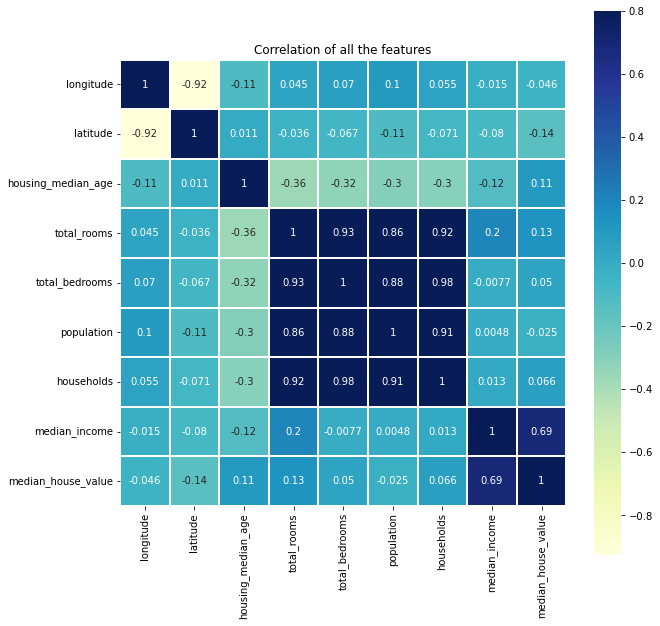

In [7]:
# Resizing, generating heatmaps to understand the correlation between the columns

fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(data.corr(), 
                 vmax=.8, 
                 linewidths=0.01, 
                 square=True,
                 cmap='YlGnBu', 
                 annot=True,
                 linecolor="white")

plt.title("Correlation of all the features")

Correlation matrix shows the linear corrlation between features, the correlation being closer to 1 indicates strong positive correlation, the number being closer to -1 indicates strong negative correlation

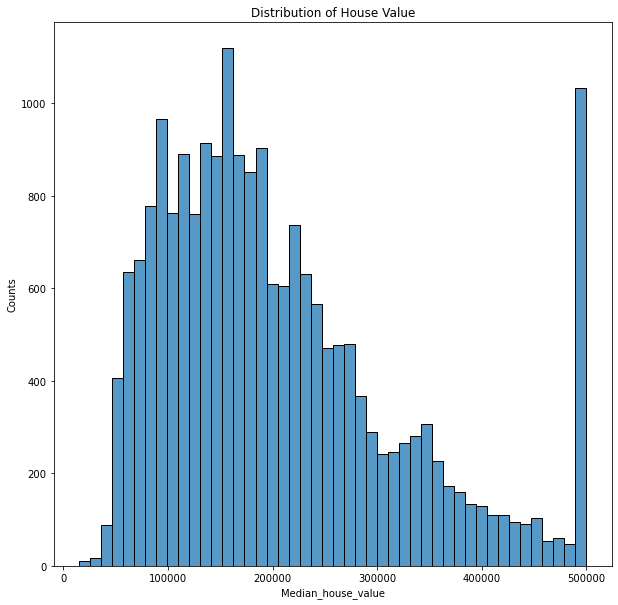

In [9]:
# Histogram to understand the distribution of target variable

fig, ax = plt.subplots(figsize=(10,10))  
ax=sns.histplot(data=data,x="median_house_value")
#plot for total rooms, bedrooms, median income
plt.title("Distribution of House Value")
plt.ylabel("Counts")
plt.xlabel("Median_house_value");

Histograms are often used to check how the distribution is spread across the data or to understand if the data is skewed, if the data is skewed or does not follow normal distribution, we cannot proceed with z score tests. In the above histogram we can see that the Median house value is left skewed distribution.

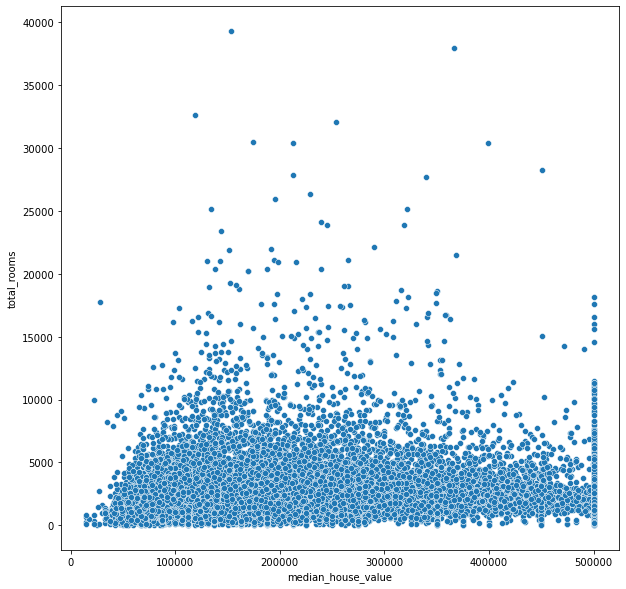

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.scatterplot(y="total_rooms",
                    x="median_house_value",
                    data=data)

Scatterplot helps us understand the linear relationship between 2 features and whether it is positive relationship or negative relationship.

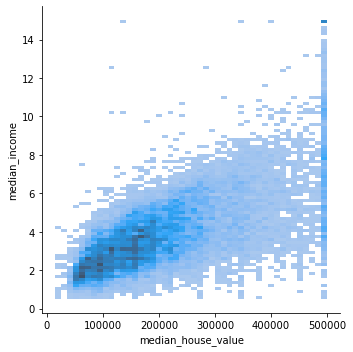

In [11]:
sns.displot(data=data, 
            x="median_house_value", 
            y="median_income")

<AxesSubplot:>

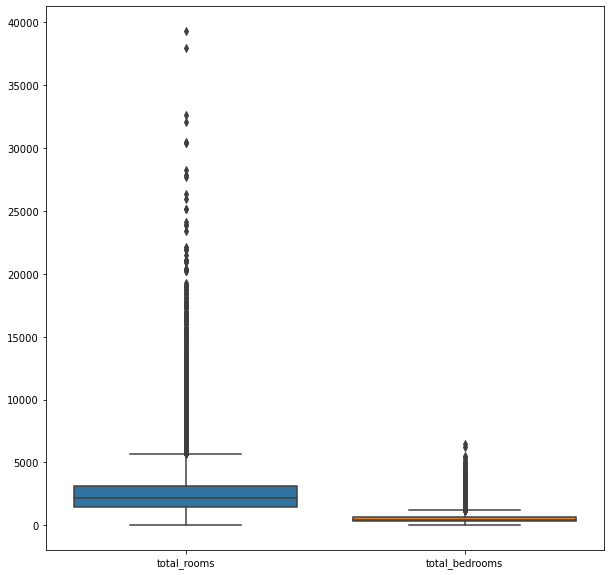

In [12]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.boxplot(data=data[['total_rooms','total_bedrooms']])

Boxplots usually helps us identify outliers, it displays data from the Interquantile ranges, and how much densely populated it is near the median region. We can notice hear that we have outliers in total_rooms, total_bedrooms, population, households, median_income

<AxesSubplot:>

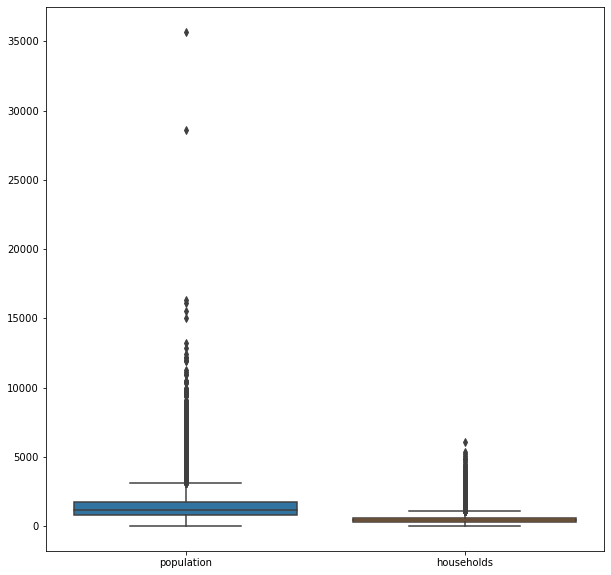

In [13]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.boxplot(data=data[['population','households']])

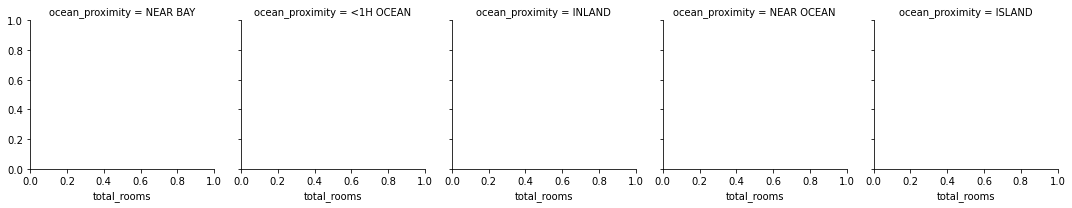

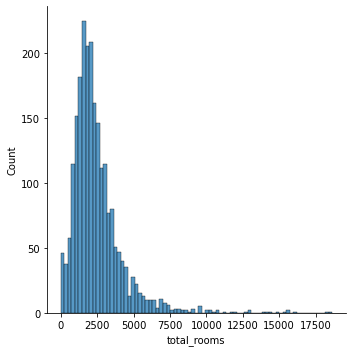

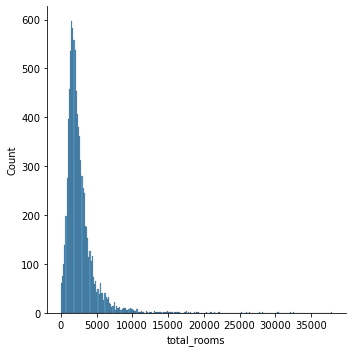

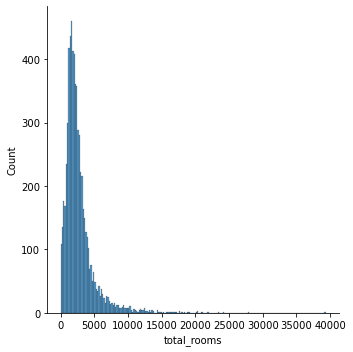

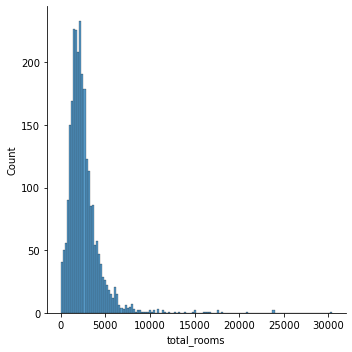

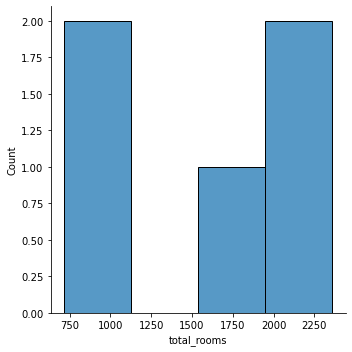

In [14]:
g = sns.FacetGrid(data, col="ocean_proximity")
g.map(sns.displot, "total_rooms")

Faceting helps read the data by grouping certain categories of data, In this case, we can see that the distribution for total_rooms is almost left skewed in most of the cases except for Island.


What type of problems can you detect in the data set? Name at least three different problems.

0. There are 207 missing values from total_bedrooms
1. There are outliers from 5 of the features
2. Encoding categorical variable
3. Deciding an approach on imputing Nans and handling outliers
4. Feature scaling
5. Feature selection

Clean the data set using the data preprocessing techniques discussed in class. Show a sample of the data set before and after the cleaning.

Dropping empty valued rows as the number of NaNs is few

In [15]:
data[data['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [16]:
# Dropping samples with Nans

clean_data=data.dropna()
clean_data.shape

(20433, 10)

Drop duplicates, eliminating any potential duplicates from the samples

In [17]:
# Drop duplicates

clean_data.drop_duplicates()
clean_data.shape

(20433, 10)

Encoding the ocean proximity categorical variable as the models are sensitive to categorical data

In [18]:
# Encoding ocean_proximity

enc_data=pd.get_dummies(clean_data.ocean_proximity)
enc_data.head()
enc_clean_data=clean_data.join(enc_data)
enc_clean_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,0,1,0,0,0


In [19]:
enc_clean_data=clean_data.join(enc_data)
enc_clean_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,0,1,0,0,0


In [20]:
# Dropping columns with least correlation to target variable and the encoded feature

final_clean_data=enc_clean_data.drop(columns=['ocean_proximity','longitude','latitude','population'])
final_clean_data

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,880,129.0,126,8.3252,452600,0,0,0,1,0
1,21,7099,1106.0,1138,8.3014,358500,0,0,0,1,0
2,52,1467,190.0,177,7.2574,352100,0,0,0,1,0
3,52,1274,235.0,219,5.6431,341300,0,0,0,1,0
4,52,1627,280.0,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,330,1.5603,78100,0,1,0,0,0
20636,18,697,150.0,114,2.5568,77100,0,1,0,0,0
20637,17,2254,485.0,433,1.7000,92300,0,1,0,0,0
20638,18,1860,409.0,349,1.8672,84700,0,1,0,0,0


In [21]:
#Feature normalization

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

We normalize the data to accomodate better results as scaled and preprocessed data is more likely to yield better results than a regular input

In [22]:
scale.fit_transform(clean_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97331952,
        -0.97683327,  2.34516291],
       [-1.32232256,  1.04235526, -0.60621017, ...,  0.86133924,
         1.67037262,  2.33263161],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.81976943,
        -0.84342665,  1.78293943],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.36882637,
        -0.17377773, -1.14317103],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.60356386,
        -0.39350628, -1.05513604],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.03348711,
         0.07995643, -0.78060586]])

In [23]:
scale.mean_

array([-119.57068859,   35.63322126,   28.63309353, 2636.50423335,
        537.87055254, 1424.94694856,  499.43346547,    3.8711616 ])

#### Data before preprocessing

In [25]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [26]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Clean data after preprocessing

In [27]:
final_clean_data

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,880,129.0,126,8.3252,452600,0,0,0,1,0
1,21,7099,1106.0,1138,8.3014,358500,0,0,0,1,0
2,52,1467,190.0,177,7.2574,352100,0,0,0,1,0
3,52,1274,235.0,219,5.6431,341300,0,0,0,1,0
4,52,1627,280.0,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,330,1.5603,78100,0,1,0,0,0
20636,18,697,150.0,114,2.5568,77100,0,1,0,0,0
20637,17,2254,485.0,433,1.7000,92300,0,1,0,0,0
20638,18,1860,409.0,349,1.8672,84700,0,1,0,0,0


In [28]:
final_clean_data.describe()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,12.591805,2185.269567,421.385070,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,1.000000,2.000000,1.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1450.000000,296.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2127.000000,435.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,3143.000000,647.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,52.000000,39320.000000,6445.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Extract at least two new features from the data set that have strong correlation with the target feature.

In [29]:
median_income_per_household=final_clean_data.households/final_clean_data.median_income
median_income_per_household

0         15.134772
1        137.085311
2         24.388900
3         38.808456
4         67.339192
            ...    
20635    211.497789
20636     44.586984
20637    254.705882
20638    186.910883
20639    221.887298
Length: 20433, dtype: float64

In [30]:
final_clean_data['median_income_per_household']=median_income_per_household
final_clean_data

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_per_household
0,41,880,129.0,126,8.3252,452600,0,0,0,1,0,15.134772
1,21,7099,1106.0,1138,8.3014,358500,0,0,0,1,0,137.085311
2,52,1467,190.0,177,7.2574,352100,0,0,0,1,0,24.388900
3,52,1274,235.0,219,5.6431,341300,0,0,0,1,0,38.808456
4,52,1627,280.0,259,3.8462,342200,0,0,0,1,0,67.339192
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,330,1.5603,78100,0,1,0,0,0,211.497789
20636,18,697,150.0,114,2.5568,77100,0,1,0,0,0,44.586984
20637,17,2254,485.0,433,1.7000,92300,0,1,0,0,0,254.705882
20638,18,1860,409.0,349,1.8672,84700,0,1,0,0,0,186.910883


In [31]:
median_income_per_room=final_clean_data.total_rooms/final_clean_data.median_income
median_income_per_room

0         105.703166
1         855.156961
2         202.138507
3         225.762436
4         423.014924
            ...     
20635    1067.102480
20636     272.606383
20637    1325.882353
20638     996.143959
20639    1165.954953
Length: 20433, dtype: float64

In [32]:
final_clean_data['median_income_per_room']=median_income_per_room
final_clean_data

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_per_household,median_income_per_room
0,41,880,129.0,126,8.3252,452600,0,0,0,1,0,15.134772,105.703166
1,21,7099,1106.0,1138,8.3014,358500,0,0,0,1,0,137.085311,855.156961
2,52,1467,190.0,177,7.2574,352100,0,0,0,1,0,24.388900,202.138507
3,52,1274,235.0,219,5.6431,341300,0,0,0,1,0,38.808456,225.762436
4,52,1627,280.0,259,3.8462,342200,0,0,0,1,0,67.339192,423.014924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,330,1.5603,78100,0,1,0,0,0,211.497789,1067.102480
20636,18,697,150.0,114,2.5568,77100,0,1,0,0,0,44.586984,272.606383
20637,17,2254,485.0,433,1.7000,92300,0,1,0,0,0,254.705882,1325.882353
20638,18,1860,409.0,349,1.8672,84700,0,1,0,0,0,186.910883,996.143959


In [33]:
final_clean_data.corr()['median_house_value']

housing_median_age             0.106432
total_rooms                    0.133294
total_bedrooms                 0.049686
households                     0.064894
median_income                  0.688355
median_house_value             1.000000
<1H OCEAN                      0.257614
INLAND                        -0.484787
ISLAND                         0.023525
NEAR BAY                       0.160526
NEAR OCEAN                     0.140378
median_income_per_household   -0.220905
median_income_per_room        -0.210371
Name: median_house_value, dtype: float64

We can notice that the 2 new features that were extracted from the original features are median_income_per_household, median_income_per_room, they signify a negative correlation towards the target feature